## Partie 1

Il faut travailler sur le TP-2.1 avant commencer ce TP noté.
Il est interdit d'utiliser ChatGPT ou toute autre extension IA. Vous pourriez être amené à fournir une explication sur un code que vous avez réalisé. Vous recevrez une note de 0 si vous ne pouvez pas fournir une explication. Une explication incorrecte est acceptable, mais une explication sans sens ne le sera pas.

Vous allez implémenter et résoudre le problème de régression linéaire (excercie 5 du TD) avec une implémentation de l'algorithm descente de gradient en Python. Ce notebook utilise la bibliothèque numpy pour les calculs et matplotlib pour la visualisation



**Utiliser les informations données dans l'excecise 05 du TD et completer ce code**

Poids finaux après 4 itérations: [array([0, 1]), array([0.25, 1.4 ]), array([0.415 , 1.6625]), array([0.524125, 1.834625]), array([0.59651875, 1.94735   ])]
Historique des coûts: [3.25, 1.4062500000000002, 0.6096515625000003, 0.26546136328125014, 0.11672851939453127]


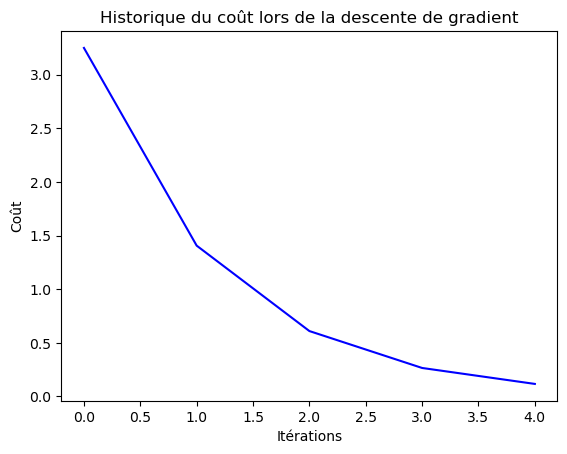

In [3]:
# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt

# TODO: Définir les données
data = np.array([
    [1,3],  
    [2,5]   
])

# TODO: Extraire les caractéristiques et les cibles
X =  data[:, 0]  # Caractéristiques
y =  data[:, 1]  # Cibles

# Ajouter une colonne de 1 pour le terme de biais (w0)
X = np.c_[np.ones(X.shape[0]), X]

# TODO: Initialiser les poids
w = np.array([0,1])  # w0, w1

# TODO: Définir le taux d'apprentissage
alpha = 0.1

# Fonction de coût (Mean Squared Error)
def compute_cost(X, y, w):
    N = len(y)
    cost = 0
    for i in range(N):
        # TODO: compléter
        prediction = X[i,:] @ w # produit scalaire entre X[i,:] et w 
        error = prediction - y[i]
        cost += error**2
    cost = cost / (2*N)
    return cost

def compute_gradient(X, y, w):
    """X : jeu de données en entrée de forme (N,D)
        N : nombre d'exemples
        D : caractéristique x_0 et x_1, ... x_D
    y : cible de forme (N,)
    w : paramètres de forme (D,)

    Returns:
    gradient -- les dérivées partielles de la fonction de coût par rapport à w, de forme (D,)
    """
    N, D = X.shape
    grad = np.zeros((D, ))

    for j in range(D):
        gradient_sum = 0
        for i in range(N):
             # TODO: compléter
            pred = X[i,:] @ w
            loss = pred - y[i]
            gradient_sum += loss * X[i,j]
        grad[j] = gradient_sum / N

    return grad

# Fonction de mise à jour des poids
def gradient_descent(X, y, w_init, eta, iters):
    ''' X : jeu de données en entrée de forme (N, D)
    y : cible de forme (N, )
    w : paramètres de forme (D, )
    eta : taux d'apprentissage.
    iters : nombre d'itérations.

    Returns:
    w_history -- une liste des paramètres w à chaque itération
    cost_history -- une liste des coûts à chaque itération
    '''

    # historique des coûts à chaque itération
    cost_history = [compute_cost(X, y, w_init)]
    # creer une liste pour stocker les paramètres w à chaque itération
    w_history = [w_init]
    
    for i in range(iters):
        # calculez le gradient pour le paramètre actuel w
        # TODO: compléter
        gradient = compute_gradient(X, y, w_history[-1])
        w_new = w_history[-1] - eta * gradient
        cost = compute_cost(X, y, w_new)
        
        # Vous devriez stocker le coût pour chaque iteration, c'est utile pour vérifier si le coût diminue ...
        cost_history.append(cost)
        w_history.append(w_new) 
    return w_history, cost_history


# Définir le nombre d'itérations
iterations = 4

# Appliquer la descente de gradient
w_final, cost_history = gradient_descent(X, y, w, alpha, iterations)

# Afficher les résultats
print(f'Poids finaux après {iterations} itérations: {w_final}')
print(f'Historique des coûts: {cost_history}')

# Visualiser l'historique des coûts
plt.plot(range(iterations+1), cost_history, 'b-')
plt.xlabel('Itérations')
plt.ylabel('Coût')
plt.title('Historique du coût lors de la descente de gradient')
plt.show()


## PARTIE 2 
Maintenant, à la place 1 liste de 2 maisons, vous allez travailler avec une autre base de données, une liste de 1200 maisons dans le fichier **data/tp3-maison-train.txt**

Vous pouvez commencer par charger et supprimer la 3eme colone contenant des valeurs strings.

Poids finaux après 20 itérations: [array([0, 1, 2]), array([1.79405572e-02, 3.12373413e+01, 2.05256864e+00]), array([3.12918074e-02, 5.36517337e+01, 2.09130704e+00]), array([4.12410876e-02, 7.02671162e+01, 2.11979333e+00]), array([4.86685494e-02, 8.25837978e+01, 2.14067993e+00]), array([5.42266329e-02, 9.17139307e+01, 2.15593300e+00]), array([5.83989803e-02, 9.84819327e+01, 2.16701004e+00]), array([6.15441065e-02, 1.03498930e+02, 2.17499148e+00]), array([6.39277725e-02, 1.07217940e+02, 2.18067819e+00]), array([6.57469818e-02, 1.09974774e+02, 2.18466387e+00]), array([6.71477696e-02, 1.12018366e+02, 2.18738860e+00]), array([6.82383891e-02, 1.13533244e+02, 2.18917861e+00]), array([6.90990866e-02, 1.14656196e+02, 2.19027574e+00]), array([6.97893470e-02, 1.15488620e+02, 2.19085924e+00]), array([7.03532655e-02, 1.16105681e+02, 2.19106200e+00]), array([7.08235290e-02, 1.16563098e+02, 2.19098252e+00]), array([7.12243678e-02, 1.16902173e+02, 2.19069383e+00]), array([7.15737434e-02, 1.17153523e+

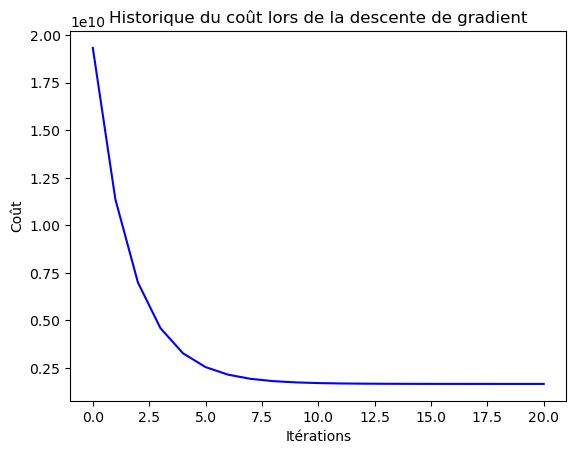

,Size,Bedrooms,Price
0,1068,3,154500
1,2622,3,325000
2,1028,2,115000
3,1664,3,159000
4,1620,2,315500


In [4]:
import pandas as pd

file = 'data/tp3-maison-train.txt'
data2 = pd.read_csv(file, header=None, names=['Size', 'Bedrooms', 'City',  'Price'])

# Remove the third column CITY (index 2, as Python indexing starts from 0)
data2.drop(data2.columns[2], axis=1, inplace=True)
myData = np.array(data2)
w = np.array([0,1,2])

# TODO: Définir le taux d'apprentissage
alpha = 0.0000001

X = myData[:, 0:2]
X = np.c_[np.ones(X.shape[0]), X]
y = myData[:,2]

iterations = 20

w_final, cost_history = gradient_descent(X, y, w, alpha, iterations)


# Afficher les résultats
print(f'Poids finaux après {iterations} itérations: {w_final}')
print(f'Historique des coûts: {cost_history}')

# Visualiser l'historique des coûts
plt.plot(range(iterations+1), cost_history, 'b-')
plt.xlabel('Itérations')
plt.ylabel('Coût')
plt.title('Historique du coût lors de la descente de gradient')
plt.show()

data2.head()

#### TODO 
Utiliser le code précédent et construire un modèle sur cette base de données. Analyser la performance du modèle en evaluant le modèle sur la base de test **data/tp3-maison-test.txt**.

Essayer de trouver le meilleure modèle. Il faut bien choisir le taux d'apprentissage. Une autre idée pour améliorer le modèle, c'est à normaliser les valeurs de l'ensemble de données.:

- Soustraire la valeur moyenne de chaque caractéristique de l'ensemble de données.
- Après avoir soustrait la moyenne, mettez à l'échelle (divisez) en plus les valeurs des caractéristiques par leurs « écarts-types » respectifs.

Une autre idéée est d'utiliser la 3eme colone (CITY) en utilisant l'encodage ONE-HOT. 

Il faut visualiser la courbe coût vs itérations pour la base de train et la base de test comme ci-dessus. Analyser ces 2 courbes.

**On va noter votre notebook, y compris la performance de votre modèle final**